In [62]:
getwd()

[1] "/home/jovyan"

#### Step 1: Load the dataset

In [63]:
bitterling_data <- read.csv('Data/MNVterr.csv')

#### Step 2: Data Cleaning and Preprocessing
##### Check for missing values

In [64]:
summary(bitterling_data)

     date            focal_male              sl           distance     
 Length:56          Length:56          Min.   :43.00   Min.   : 10.00  
 Class :character   Class :character   1st Qu.:55.00   1st Qu.: 27.50  
 Mode  :character   Mode  :character   Median :55.00   Median : 50.00  
                                       Mean   :54.86   Mean   : 51.07  
                                       3rd Qu.:57.00   3rd Qu.: 72.50  
                                       Max.   :58.00   Max.   :100.00  
   aggression        fm_ejac       sneak_ejac     spawning        
 Min.   :  1.00   Min.   : 0.0   Min.   :0.00   Length:56         
 1st Qu.:  8.00   1st Qu.: 0.0   1st Qu.:0.00   Class :character  
 Median : 14.50   Median : 0.0   Median :0.00   Mode  :character  
 Mean   : 20.55   Mean   : 1.5   Mean   :0.75                     
 3rd Qu.: 27.25   3rd Qu.: 2.0   3rd Qu.:1.00                     
 Max.   :113.00   Max.   :10.0   Max.   :5.00                     
  monopolise       
 Length

In [65]:
str(bitterling_data)

'data.frame':	56 obs. of  9 variables:
 $ date      : chr  "5/14/1997" "5/14/1997" "5/14/1997" "5/14/1997" ...
 $ focal_male: chr  "A" "A" "A" "A" ...
 $ sl        : int  55 55 55 55 55 55 55 55 55 55 ...
 $ distance  : int  60 20 10 100 30 50 80 40 90 50 ...
 $ aggression: int  20 113 43 32 28 46 44 47 83 43 ...
 $ fm_ejac   : int  4 0 1 4 1 0 1 8 10 1 ...
 $ sneak_ejac: int  1 0 0 2 0 0 1 2 4 0 ...
 $ spawning  : chr  "yes" "no" "no" "no" ...
 $ monopolise: chr  "no" "yes" "yes" "no" ...


In [66]:
bitterling_data |> head()

,date,focal_male,sl,distance,aggression,fm_ejac,sneak_ejac,spawning,monopolise
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,5/14/1997,A,55,60,20,4,1,yes,no
2,5/14/1997,A,55,20,113,0,0,no,yes
3,5/14/1997,A,55,10,43,1,0,no,yes
4,5/14/1997,A,55,100,32,4,2,no,no
5,5/14/1997,A,55,30,28,1,0,no,no
6,5/14/1997,A,55,50,46,0,0,no,no


##### Convert date column to Date format

In [67]:
bitterling_data$date <- as.Date(bitterling_data$date, format = "%m/%d/%Y")

##### Convert non-numeric variables to factors

In [68]:
bitterling_data$focal_male <- as.factor(bitterling_data$focal_male)
bitterling_data$spawning <- as.factor(bitterling_data$spawning)
bitterling_data$monopolise <- as.factor(bitterling_data$monopolise)

#### Step 3: Data Visualization

In [69]:
# install.packages('GGally')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [70]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(GGally)

#### Scatter plot of body size (sl) vs. territory size (distance)

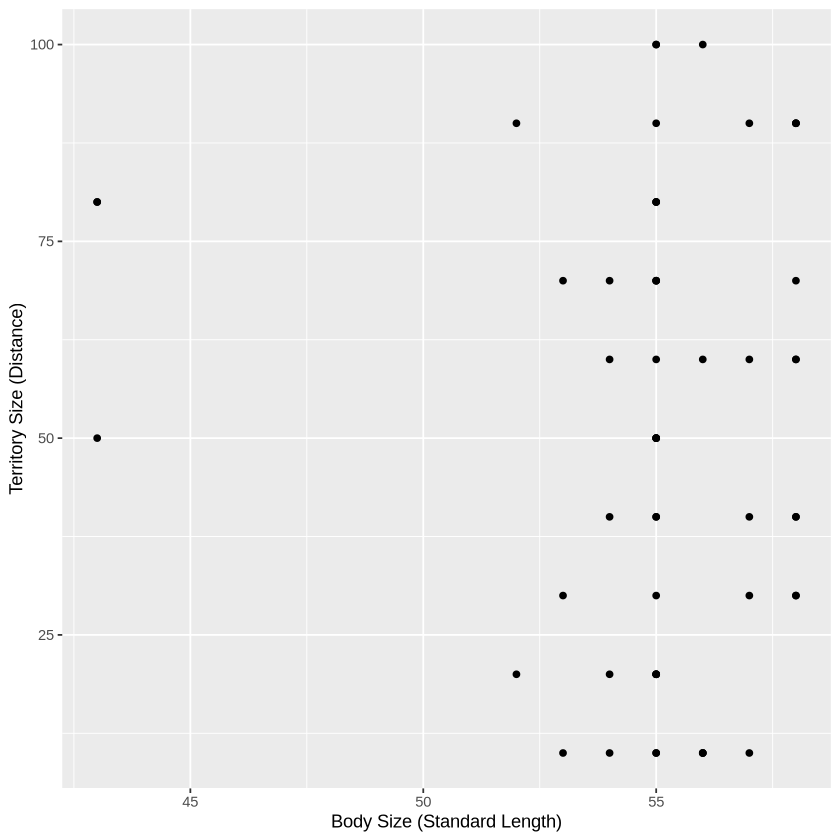

In [71]:
ggplot(bitterling_data, aes(x = sl, y = distance)) +
  geom_point() +
  labs(x = "Body Size (Standard Length)", y = "Territory Size (Distance)")

In [72]:
numeric_vars <- c("sl", "distance", "aggression", "fm_ejac", "sneak_ejac")

In [73]:
boxplot_data <- pivot_longer(bitterling_data[, numeric_vars], cols = all_of(numeric_vars))

In [74]:
boxplot_data |> head(10)

name,value
<chr>,<int>
sl,55
distance,60
aggression,20
fm_ejac,4
sneak_ejac,1
sl,55
distance,20
aggression,113
fm_ejac,0


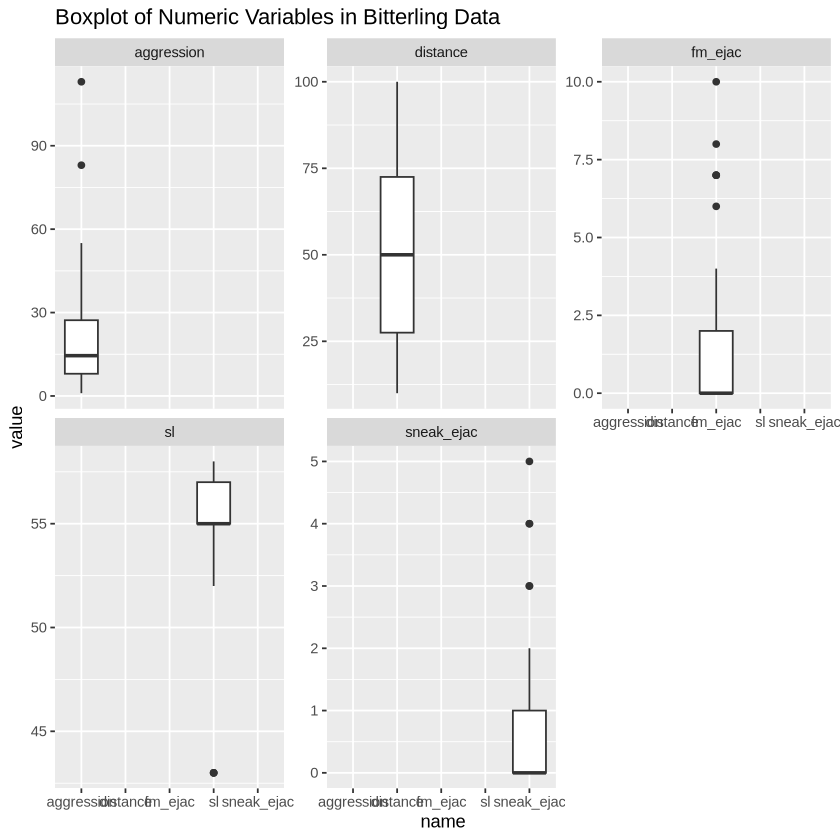

In [75]:
ggplot(data = boxplot_data, aes(x = name, y = value)) +
  geom_boxplot() +
  facet_wrap(~name, scales = "free_y") +
  labs(title = "Boxplot of Numeric Variables in Bitterling Data")

#### Create scatterplot matrix with facetting

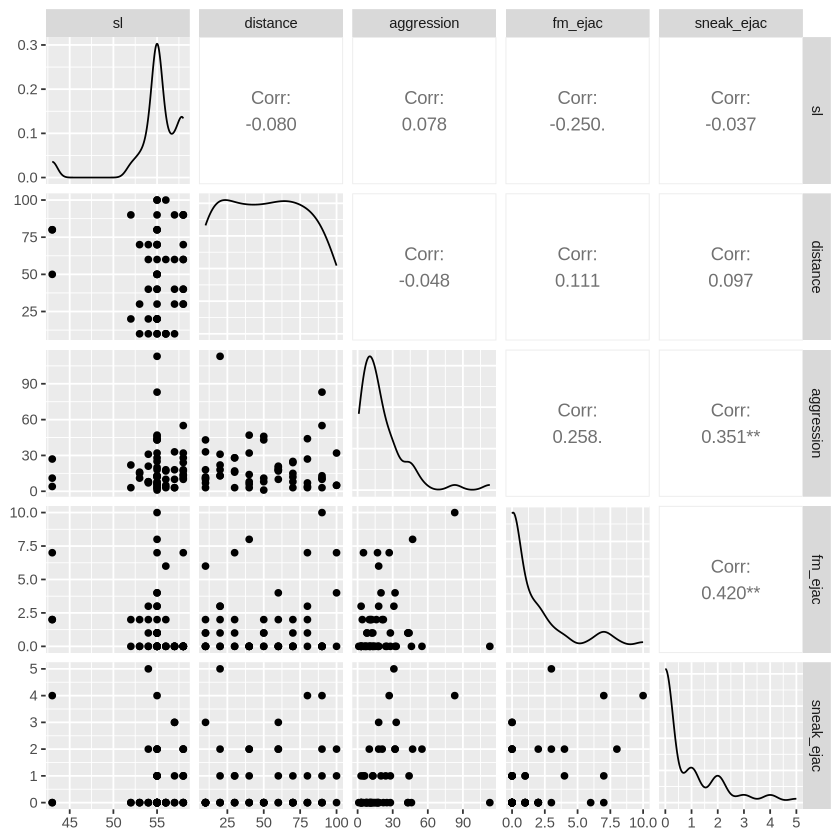

In [76]:
ggpairs(bitterling_data |> select(numeric_vars))

##### Create boxplots for numeric variables with facetting

##### create new features

In [77]:
bitterling_data <- bitterling_data |> 
    mutate(fm_ej_aggr = fm_ejac / aggression) |>
    mutate(aggr_sl = aggression / sl) |>
    mutate(fm_ej_sl = fm_ejac / sl)

In [78]:
bitterling_data |> head()

,date,focal_male,sl,distance,aggression,fm_ejac,sneak_ejac,spawning,monopolise,fm_ej_aggr,aggr_sl,fm_ej_sl
,<date>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1997-05-14,A,55,60,20,4,1,yes,no,0.20000000,0.3636364,0.07272727
2,1997-05-14,A,55,20,113,0,0,no,yes,0.00000000,2.0545455,0.00000000
3,1997-05-14,A,55,10,43,1,0,no,yes,0.02325581,0.7818182,0.01818182
4,1997-05-14,A,55,100,32,4,2,no,no,0.12500000,0.5818182,0.07272727
5,1997-05-14,A,55,30,28,1,0,no,no,0.03571429,0.5090909,0.01818182
6,1997-05-14,A,55,50,46,0,0,no,no,0.00000000,0.8363636,0.00000000


In [86]:
m <- lm(data = bitterling_data, formula = distance ~ sl)
summary(m)


Call:
lm(formula = distance ~ sl, data = bitterling_data)

Residuals:
   Min     1Q Median     3Q    Max 
-42.39 -24.53  -0.97  20.53  49.74 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  89.9274    65.8520   1.366    0.178
sl           -0.7083     1.1984  -0.591    0.557

Residual standard error: 28.88 on 54 degrees of freedom
Multiple R-squared:  0.006428,	Adjusted R-squared:  -0.01197 
F-statistic: 0.3494 on 1 and 54 DF,  p-value: 0.5569


In [91]:
# Initialize a model with all predictors
both_model <- lm(distance ~ ., data = bitterling_data)

# Both-direction stepwise regression
both_model <- step(both_model, direction = "both")

Start:  AIC=376.69
distance ~ date + focal_male + sl + aggression + fm_ejac + sneak_ejac + 
    spawning + monopolise + fm_ej_aggr + aggr_sl + fm_ej_sl


Step:  AIC=376.69
distance ~ date + focal_male + aggression + fm_ejac + sneak_ejac + 
    spawning + monopolise + fm_ej_aggr + aggr_sl + fm_ej_sl


Step:  AIC=376.69
distance ~ focal_male + aggression + fm_ejac + sneak_ejac + spawning + 
    monopolise + fm_ej_aggr + aggr_sl + fm_ej_sl

             Df Sum of Sq   RSS    AIC
- focal_male 19    8457.5 25644 361.10
- spawning    1      33.6 17220 374.80
- fm_ej_sl    1     181.6 17368 375.28
- aggr_sl     1     219.8 17407 375.40
- aggression  1     221.2 17408 375.40
- fm_ejac     1     231.6 17418 375.44
- sneak_ejac  1     546.6 17733 376.44
<none>                    17187 376.69
- fm_ej_aggr  1    2505.1 19692 382.31
- monopolise  1   10377.9 27565 401.14

Step:  AIC=361.1
distance ~ aggression + fm_ejac + sneak_ejac + spawning + monopolise + 
    fm_ej_aggr + aggr_sl + fm_ej_sl

  

In [92]:
# Print final selected model
summary(both_model)


Call:
lm(formula = distance ~ aggression + fm_ejac + monopolise + fm_ej_aggr + 
    aggr_sl + fm_ej_sl, data = bitterling_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.758 -15.267  -3.972  13.539  62.984 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     71.704      6.928  10.350 6.34e-14 ***
aggression       7.914      5.471   1.447   0.1544    
fm_ejac        -33.898     23.683  -1.431   0.1587    
monopoliseyes  -34.469      6.826  -5.049 6.53e-06 ***
fm_ej_aggr      38.761     17.375   2.231   0.0303 *  
aggr_sl       -445.657    303.491  -1.468   0.1484    
fm_ej_sl      1806.553   1322.969   1.366   0.1783    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.92 on 49 degrees of freedom
Multiple R-squared:  0.4324,	Adjusted R-squared:  0.3629 
F-statistic: 6.222 on 6 and 49 DF,  p-value: 6.589e-05
